# Following are the two datasets I have used to support my hypothesis and answer some questions.
**Data set 1**- *Food establishment inspection* 
Data Source-https://data.boston.gov/dataset/food-establishment-inspections)

**Data set 2**- *Boston census tract population-2010*
Data Source-https://factfinder.census.gov/ (table no S0101
and the state of Massachusetts.)



Hypothesis:

1) If the population is high then there would be more food inspections and complaints. 

2) The complaints/inspections would be more on weekends than weekdays as there is more rush on weekends than weekdays.

Question:

1) Which owner is highly inspected or have more complaints reported?

2) In which year most of the inspections were reported?

# Description: The Health Division of the Department of Inspectional Services ensures that all food establishments in the City of Boston meet relevant sanitary codes and standards. Businesses that serve food are inspected at least once a year, and follow-up inspections are performed on high risk establishments. Health inspections are also conducted in response to complaints of unsanitary conditions or illness. 
# FactFinder is the website by American goverment which has census data. The data is collected from surveys. Boston Census data includes data per zipcode of the city Boston.

Size of Food inspection data: 228.8 MB 

Size of Census Data: 204.3 KB

Size of jupyter notebook: 110 KB

Number of rows Food inspection data :594789 

Number of columns Food inspection data :26

Number of rows Censu data :500 

Number of columns Census data :6

The data was provided by the Boston goverment data portal.

Data Consistences:The Boston food establishment data was updated regularly. So, while performing the analysis, there were some inconsistencies as the new data had some missing values. Many other columns also had missing values, but as I was not going to use it I have not filled them or dropped them. There were multiple columns with date and time. The meaning of the columns was not known so ‘issdttm’ is assumed to be the column in which the inspections or complaints is reported. To see whether the complaints were uploaded bt the other organization on the data was entered when the inspection was registered graph was plot. The results of the graph shows that the majority of the complaints was reported on weekdays.  

To find the owner with the maximum complaints value_count function was used. 

To check the number of complaints per zip code population, a new dataframe was created which had the number of complaints per zip code and the population of the zip code. The graph suggested that, the hypothesis was invalid. The graph illustrates that even in the highly populated area there were fewer complaints than with the area which had more population.
  

# (In)Validation of Hypotheses:
1) It is evident from the graph plotted between number of complaints and poppulation that area with more population have less number of complaints. There is no linear relation observed between the complaints/inspection rate versus population of the area.Thus, the hypothesis is invalid

2) The graph of number of inspections/complaints per week day suggest that on weekdays there were more number of complaints were reported than weekends. We can assume that these records were updated on weekdays. The dates are not the actual dates when the inspection/complaints are reported. Thus, the second hypothesis is also invalid.

Note- Figure is used to provide the evidence of hypothesis.

# Answer
1)The owner with the highest complaints/inspection rate is MCCOY RICHARD.

2)In the year 2012, highest number of inspections were roprted.

Note- The question is answered using the value count function.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt
from datetime import datetime
import seaborn as sns
import time

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
boston_df=pd.read_csv("https://data.boston.gov/dataset/03693648-2c62-4a2c-a4ec-48de2ee14e18/resource/4582bec6-2b4f-4f9e-bc55-cbaa73117f4c/download/tmpfzrcujiu.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
boston_df.head()

,businessname,dbaname,legalowner,namelast,namefirst,licenseno,issdttm,expdttm,licstatus,licensecat,descript,result,resultdttm,violation,viollevel,violdesc,violdttm,violstatus,statusdate,comments,address,city,state,zip,property_id,location
0,100 Percent Delicia Food,NaN,BRENNAN PATRICK E,Marte,Civelis,87059,2013-04-05 12:47:23,2020-12-31 23:59:00,Active,FS,Eating & Drinking,HE_Fail,2013-02-15 12:19:42,15-4-202.16,*,Non-Food Contact Surfaces,2013-02-15 12:19:42,Fail,NaN,Provide glass storage rack.,635 Hyde Park AVE,Roslindale,MA,02131,77476.0,"(42.278590000, -71.119440000)"
1,100 Percent Delicia Food,NaN,BRENNAN PATRICK E,Marte,Civelis,87059,2013-04-05 12:47:23,2020-12-31 23:59:00,Active,FS,Eating & Drinking,HE_Fail,2013-02-15 12:19:42,16-4-501.11/.15,*,Dishwashng Facilities,2013-02-15 12:19:42,Fail,NaN,Provide dish rack over 3 bay sink to replace m...,635 Hyde Park AVE,Roslindale,MA,02131,77476.0,"(42.278590000, -71.119440000)"
2,100 Percent Delicia Food,NaN,BRENNAN PATRICK E,Marte,Civelis,87059,2013-04-05 12:47:23,2020-12-31 23:59:00,Active,FS,Eating & Drinking,HE_Fail,2013-02-15 12:19:42,16-4-501.11/.15,*,Dishwashng Facilities,2013-02-15 12:19:42,Fail,NaN,Provide dish washer at ware washing area.,635 Hyde Park AVE,Roslindale,MA,02131,77476.0,"(42.278590000, -71.119440000)"
3,100 Percent Delicia Food,NaN,BRENNAN PATRICK E,Marte,Civelis,87059,2013-04-05 12:47:23,2020-12-31 23:59:00,Active,FS,Eating & Drinking,HE_Fail,2013-02-15 12:19:42,29-5-201/02.11,*,Installed and Maintained,2013-02-15 12:19:42,Fail,NaN,Provide mop sink at basement.,635 Hyde Park AVE,Roslindale,MA,02131,77476.0,"(42.278590000, -71.119440000)"
4,100 Percent Delicia Food,NaN,BRENNAN PATRICK E,Marte,Civelis,87059,2013-04-05 12:47:23,2020-12-31 23:59:00,Active,FS,Eating & Drinking,HE_Fail,2013-02-15 12:19:42,31-5-204/05.11,***,Location Accessible,2013-02-15 12:19:42,Fail,NaN,No hand sink at Bar Area provide.,635 Hyde Park AVE,Roslindale,MA,02131,77476.0,"(42.278590000, -71.119440000)"


In [4]:
boston_df['violdesc'].nunique()

376

In [5]:
boston_df.shape

(596971, 26)

In [6]:
boston_df.dtypes

businessname     object
dbaname          object
legalowner       object
namelast         object
namefirst        object
licenseno         int64
issdttm          object
expdttm          object
licstatus        object
licensecat       object
descript         object
result           object
resultdttm       object
violation        object
viollevel        object
violdesc         object
violdttm         object
violstatus       object
statusdate       object
comments         object
address          object
city             object
state            object
zip              object
property_id     float64
location         object
dtype: object

The data types suggests that we need to convert the data types of dates to the data-time format as its datatype is object.

Checking the missing value

The missing value is being checked to know that if the columns being used have missing values or not.

In [7]:
missing_values={}
columns=[]
no_missing_values=[]
for cols in boston_df.columns:
    missing_value=boston_df[cols].isna().sum()
    columns.append(cols)
    no_missing_values.append(missing_value)
missing_values["Columns"]=columns
missing_values["Number of Missing Values"]=no_missing_values
#print(missing_values)
missing_values_df=pd.DataFrame.from_dict(missing_values) #https://stackoverflow.com/questions/4527454/python-dictionary-contains-list-as-value-how-to-update
missing_values_df

,Columns,Number of Missing Values
0,businessname,0
1,dbaname,591303
2,legalowner,184470
3,namelast,0
4,namefirst,114
5,licenseno,0
6,issdttm,0
7,expdttm,0
8,licstatus,0
9,licensecat,0


# Question:
Which owner is highly inspected?

Answer to the question.

In [8]:
boston_df['legalowner'].value_counts()

                                            33778
MCCOY RICHARD                                2352
GILLETTE CAFETERIA EDWARD C. COLEMAN         1810
PETER LUU  PRES.                             1626
JACK LYONS  MANAGER                          1594
                                            ...  
MICHAEL G. KIFLEMARIAM                          1
ANN VO                                          1
MANSOUR JAMALEDDINE MCDONALD'S                  1
HOLLYWOOD ENTERTAINMENT DELOITTE TAX LLP        1
PIER FOUR INC                                   1
Name: legalowner, Length: 2657, dtype: int64

# Answer:
MCCOY RICHARD

Converting 'issdttm' to datetime type

In [0]:
boston_df['Time']=pd.to_datetime(boston_df['issdttm'], format='%Y-%m-%d %H:%M:%S',errors="coerce")

Checking to make sure it does not have missing values.

In [10]:
boston_df.issdttm.isnull().sum()

0

In [11]:
boston_df['Time'].head()

0   2013-04-05 12:47:23
1   2013-04-05 12:47:23
2   2013-04-05 12:47:23
3   2013-04-05 12:47:23
4   2013-04-05 12:47:23
Name: Time, dtype: datetime64[ns]

In [0]:
boston_df['Hour']=boston_df['Time'].dt.hour
boston_df['day']=boston_df['Time'].dt.day
boston_df['month']=boston_df['Time'].dt.month
boston_df['year']=boston_df['Time'].dt.year

While trying to get the day of the week from the 'Time' column, there was an error- Could not convert NAN values. Thus I had to check the 'Time' column for null values.

In [13]:
boston_df['Time'].isnull().sum()

302

In [14]:
boston_df[boston_df['Time'].isnull()]

,businessname,dbaname,legalowner,namelast,namefirst,licenseno,issdttm,expdttm,licstatus,licensecat,descript,result,resultdttm,violation,viollevel,violdesc,violdttm,violstatus,statusdate,comments,address,city,state,zip,property_id,location,Time,Hour,day,month,year
7018,AFC Sushi @ Emerson College,NaN,,AFC Franchise Corp.,Att: Accounts Payable,385773,,,Inactive,FT,Eating & Drinking w/ Take Out,HE_Fail,2019-03-05 11:02:06,37-6-501.11-.12,*,Improper Maintenance of Walls/Ceilings,2019-03-05 11:02:06,Fail,NaN,Retail area where no food prep was done is now...,120 Boylston ST,Boston,MA,02116,340876.0,"(42.352219000, -71.065735000)",NaT,NaN,NaN,NaN,NaN
7019,AFC Sushi @ Emerson College,NaN,,AFC Franchise Corp.,Att: Accounts Payable,385773,,,Inactive,FT,Eating & Drinking w/ Take Out,HE_OutBus,2019-07-18 08:14:51,37-6-501.11-.12,*,Improper Maintenance of Walls/Ceilings,2019-07-18 08:14:51,Pass,2019-07-18 08:49:26,Retail area where no food prep was done is now...,120 Boylston ST,Boston,MA,02116,340876.0,"(42.352219000, -71.065735000)",NaT,NaN,NaN,NaN,NaN
10301,Alex's Ugly Sauce,NaN,NaN,Bourgeois,Alex,416835,,,Active,RF,Retail Food,HE_Pass,2019-12-13 10:43:28,NaN,NaN,NaN,,NaN,NaN,,100 Hanover ST,Boston,MA,02108,355634.0,NaN,NaT,NaN,NaN,NaN,NaN
23828,Arclight Cinemas,NaN,NaN,Pacific Theatres Exhibition Corpl,Att: Accounts Payable,370463,,,Active,FT,Eating & Drinking w/ Take Out,HE_Pass,2019-11-22 17:14:30,NaN,NaN,NaN,,NaN,NaN,,60 Causeway St,Boston,MA,02114,439200.0,NaN,NaT,NaN,NaN,NaN,NaN
58716,Bocao Restaurant & Grill,NaN,NaN,Bocao Restaurant Company,Att: Accounts Payable,392518,,,Active,FS,Eating & Drinking,HE_Fail,2019-04-25 11:21:17,14-4-202.11,*,Food Contact Surfaces Design,2019-04-25 11:21:17,Fail,NaN,Potatoes stored in open boxes and onions prov...,3094 Washington ST,Roxbury,MA,02119,351590.0,NaN,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564961,Vasquez Restaurant,NaN,NaN,Inc,Vasquez Food Service,415052,,,Active,FT,Eating & Drinking w/ Take Out,HE_Fail,2019-11-20 10:19:26,590.006/6-201.13-C,*,Floor and Wall Junctures Coved and Enclosed ...,2019-11-20 10:19:26,Fail,NaN,Replace glass in front door. PIC stated that i...,258 Dudley ST,Roxbury,MA,02119,375035.0,NaN,NaT,NaN,NaN,NaN,NaN
564962,Vasquez Restaurant,NaN,NaN,Inc,Vasquez Food Service,415052,,,Active,FT,Eating & Drinking w/ Take Out,HE_Pass,2019-12-05 10:14:38,590.004/4-202.16-C,*,Nonfood-Contact Surfaces (C),2019-12-05 10:14:38,Pass,2019-12-06 07:14:56,Provide drain plugs for three bay sink. Discon...,258 Dudley ST,Roxbury,MA,02119,375035.0,NaN,NaT,NaN,NaN,NaN,NaN
564963,Vasquez Restaurant,NaN,NaN,Inc,Vasquez Food Service,415052,,,Active,FT,Eating & Drinking w/ Take Out,HE_Pass,2019-12-05 10:14:38,590.006/6-201.13-C,*,Floor and Wall Junctures Coved and Enclosed ...,2019-12-05 10:14:38,Pass,2019-12-06 07:14:56,Replace glass in front door. PIC stated that i...,258 Dudley ST,Roxbury,MA,02119,375035.0,NaN,NaT,NaN,NaN,NaN,NaN
583519,Wine Riot South End,NaN,NaN,First,Morgan,201259,,,Inactive,RF,Retail Food,HE_Fail,2016-08-17 14:03:52,31-5-203.11,***,Number Convenient,2016-08-17 14:03:52,Fail,NaN,No hand sink in ware washing area supply,503 Tremont ST,Boston,MA,02116,341128.0,"(42.344923000, -71.070755000)",NaT,NaN,NaN,NaN,NaN


We can see that the issdttm column is now coming null. Earlier this column had no null values. I was not able to solve this inconsistency. So I decided to drop the rows which had null values in Time column.

Dropping the rows which has the value of Time column Null.

In [0]:
boston_df = boston_df.dropna(axis=0, subset=['Time'])

Getting day of the week to check on which days the complaints are reported/updated.

In [0]:
day_of_week=[i.strftime("%A") for i in boston_df['Time']]
boston_df['day_of_week']=day_of_week

In [0]:
boston_df['num_of_day']=[int(i.strftime("%w")) for i in boston_df['Time']]

In [18]:
boston_df.dtypes

businessname            object
dbaname                 object
legalowner              object
namelast                object
namefirst               object
licenseno                int64
issdttm                 object
expdttm                 object
licstatus               object
licensecat              object
descript                object
result                  object
resultdttm              object
violation               object
viollevel               object
violdesc                object
violdttm                object
violstatus              object
statusdate              object
comments                object
address                 object
city                    object
state                   object
zip                     object
property_id            float64
location                object
Time            datetime64[ns]
Hour                   float64
day                    float64
month                  float64
year                   float64
day_of_week             object
num_of_d

In [19]:
boston_df.head()

,businessname,dbaname,legalowner,namelast,namefirst,licenseno,issdttm,expdttm,licstatus,licensecat,descript,result,resultdttm,violation,viollevel,violdesc,violdttm,violstatus,statusdate,comments,address,city,state,zip,property_id,location,Time,Hour,day,month,year,day_of_week,num_of_day
0,100 Percent Delicia Food,NaN,BRENNAN PATRICK E,Marte,Civelis,87059,2013-04-05 12:47:23,2020-12-31 23:59:00,Active,FS,Eating & Drinking,HE_Fail,2013-02-15 12:19:42,15-4-202.16,*,Non-Food Contact Surfaces,2013-02-15 12:19:42,Fail,NaN,Provide glass storage rack.,635 Hyde Park AVE,Roslindale,MA,02131,77476.0,"(42.278590000, -71.119440000)",2013-04-05 12:47:23,12.0,5.0,4.0,2013.0,Friday,5
1,100 Percent Delicia Food,NaN,BRENNAN PATRICK E,Marte,Civelis,87059,2013-04-05 12:47:23,2020-12-31 23:59:00,Active,FS,Eating & Drinking,HE_Fail,2013-02-15 12:19:42,16-4-501.11/.15,*,Dishwashng Facilities,2013-02-15 12:19:42,Fail,NaN,Provide dish rack over 3 bay sink to replace m...,635 Hyde Park AVE,Roslindale,MA,02131,77476.0,"(42.278590000, -71.119440000)",2013-04-05 12:47:23,12.0,5.0,4.0,2013.0,Friday,5
2,100 Percent Delicia Food,NaN,BRENNAN PATRICK E,Marte,Civelis,87059,2013-04-05 12:47:23,2020-12-31 23:59:00,Active,FS,Eating & Drinking,HE_Fail,2013-02-15 12:19:42,16-4-501.11/.15,*,Dishwashng Facilities,2013-02-15 12:19:42,Fail,NaN,Provide dish washer at ware washing area.,635 Hyde Park AVE,Roslindale,MA,02131,77476.0,"(42.278590000, -71.119440000)",2013-04-05 12:47:23,12.0,5.0,4.0,2013.0,Friday,5
3,100 Percent Delicia Food,NaN,BRENNAN PATRICK E,Marte,Civelis,87059,2013-04-05 12:47:23,2020-12-31 23:59:00,Active,FS,Eating & Drinking,HE_Fail,2013-02-15 12:19:42,29-5-201/02.11,*,Installed and Maintained,2013-02-15 12:19:42,Fail,NaN,Provide mop sink at basement.,635 Hyde Park AVE,Roslindale,MA,02131,77476.0,"(42.278590000, -71.119440000)",2013-04-05 12:47:23,12.0,5.0,4.0,2013.0,Friday,5
4,100 Percent Delicia Food,NaN,BRENNAN PATRICK E,Marte,Civelis,87059,2013-04-05 12:47:23,2020-12-31 23:59:00,Active,FS,Eating & Drinking,HE_Fail,2013-02-15 12:19:42,31-5-204/05.11,***,Location Accessible,2013-02-15 12:19:42,Fail,NaN,No hand sink at Bar Area provide.,635 Hyde Park AVE,Roslindale,MA,02131,77476.0,"(42.278590000, -71.119440000)",2013-04-05 12:47:23,12.0,5.0,4.0,2013.0,Friday,5


# Hypothesis:

The complaints/inspections would be more on weekends than weekdays as there is more rush on weekends than weekdays.

In [20]:
boston_df.day_of_week.value_counts()

Wednesday    145857
Tuesday      124480
Thursday     117502
Monday       102695
Friday       100359
Saturday       4706
Sunday         1070
Name: day_of_week, dtype: int64

# Graph to show the number of complaints accounted on a week day.

Text(0.5, 1.0, 'Inspection on each week day')

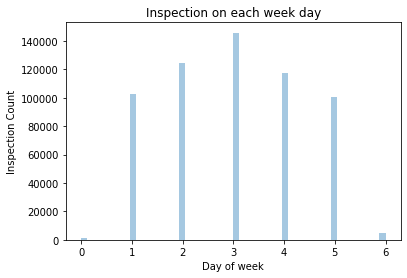

In [21]:
sns.distplot(boston_df['num_of_day'], kde=False)
plt.xlabel("Day of week")
plt.ylabel("Inspection Count")
plt.title("Inspection on each week day")

# (In)Validation of hypothesis:

It is evident from the figure that the inspections are registered majorly on weekdays.

# Question:
In which year most of the inspections were reported?


In [22]:
boston_df.year.value_counts()

2012.0    334143
2011.0    146430
2013.0     23127
2015.0     18438
2014.0     17098
2016.0     14841
2017.0      9586
2010.0      9450
2009.0      8013
2018.0      6246
2008.0      4993
2019.0      2527
2007.0      1777
Name: year, dtype: int64

Text(0.5, 1.0, 'Inspection')

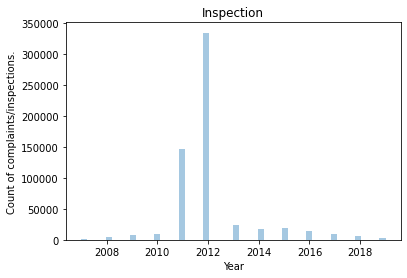

In [23]:
sns.distplot(boston_df['year'], kde=False)
plt.xlabel("Year")
plt.ylabel("Count of complaints/inspections.")
plt.title("Inspection")

# Answer:
In the year 2012, highest number of inspections were roprted.

# Census Data

The census data was spread on 5 html page. Thus created a list of those html links. Then used beautifulSoup to extract the data

In [0]:
final=[]
list_of_html_link=["http://zipatlas.com/us/ma/zip-code-comparison/population-density.htm",'http://zipatlas.com/us/ma/zip-code-comparison/population-density.2.htm','http://zipatlas.com/us/ma/zip-code-comparison/population-density.3.htm','http://zipatlas.com/us/ma/zip-code-comparison/population-density.4.htm','http://zipatlas.com/us/ma/zip-code-comparison/population-density.5.htm']
for each_link in list_of_html_link:
    res=requests.get(each_link)
    soup = BeautifulSoup(res.text, 'html.parser')
    every_table = soup.findAll('table')
    html_table_as_text = str(every_table[12])
    page_content =pd.read_html(html_table_as_text)
    pd_data=pd.DataFrame(page_content[0])
    pd_data=pd_data.iloc[1:,1:]
    final.append(pd_data)
census_df=pd.concat(final)
census_df.columns=['zip','Location','City','Population','People/Sq.Mile','National Rank']

In [25]:
census_df.head()

,zip,Location,City,Population,People/Sq.Mile,National Rank
1,02113,"42.365170, -71.055363","Boston, Massachusetts",6401,60728.26,#35
2,02115,"42.337545, -71.106173","Boston, Massachusetts",25486,30823.24,#116
3,02116,"42.349991, -71.076080","Boston, Massachusetts",19682,26352.26,#135
4,02215,"42.347053, -71.101985","Boston, Massachusetts",21963,25125.73,#145
5,02144,"42.399655, -71.122550","Somerville, Massachusetts",25058,23099.70,#161


In [26]:
census_df.shape

(500, 6)

New dataframe which has zip, population, business name and number of complaints per business.

In [0]:
final_df=boston_df[['zip','businessname']].merge(census_df[['Population','zip']],on='zip')

In [28]:
final_df.shape

(489123, 3)

In [29]:
final_df.head()

,zip,businessname,Population
0,02131,100 Percent Delicia Food,32527
1,02131,100 Percent Delicia Food,32527
2,02131,100 Percent Delicia Food,32527
3,02131,100 Percent Delicia Food,32527
4,02131,100 Percent Delicia Food,32527


Observed number of duplicate rows. Thus dropped those duplicate rows.

In [0]:
final_df.drop_duplicates(inplace=True)

The final data frame which has zip, population, businessname and no. of complaints per business.

In [0]:
final_df=final_df.merge(boston_df.groupby(['businessname']).size().reset_index(name='no_of_complaints'),on='businessname')

In [32]:
final_df.head()

,zip,businessname,Population,no_of_complaints
0,02131,100 Percent Delicia Food,32527,168
1,02131,4 Brothers Market,32527,1
2,02131,7 Star St. Bistro/Astro Diner/Rozzie Ramen,32527,106
3,02131,753 South,32527,37
4,02131,Alex Liquors,32527,2


In [33]:
final_df.tail()

,zip,businessname,Population,no_of_complaints
6604,02163,Harvard Business School Interim Dining,1191,2
6605,02163,Ruth Mulan Chu Chao Center,1191,11
6606,02163,SPANGLER STUDENT CENTER,1191,138
6607,02140,CVS No. 1264,17003,100
6608,02050,Macy's East,24828,12


New dataframe which has the total number of complaints per zip and the population of that zip code.

In [0]:
complaints_df=pd.DataFrame(final_df.groupby(['zip'])['no_of_complaints'].sum())
complaints_df.reset_index(level=['zip'],inplace=True) 
complaints_df=complaints_df.merge(final_df[['Population','zip']],on='zip')

In [35]:
complaints_df.columns

Index(['zip', 'no_of_complaints', 'Population'], dtype='object')

In [36]:
complaints_df.head()

,zip,no_of_complaints,Population
0,02050,12,24828
1,02108,25333,3446
2,02108,25333,3446
3,02108,25333,3446
4,02108,25333,3446


In [0]:
# Dropping the duplicate rows.
complaints_df.drop_duplicates(inplace=True)

In [38]:
complaints_df.dtypes

zip                 object
no_of_complaints     int64
Population          object
dtype: object

As the type of zip and population is object, need to convert it to integer type to plot the graph

In [0]:
complaints_df['zip']=complaints_df['zip'].astype('int')
complaints_df['Population']=complaints_df['Population'].astype('int')

# Hypothesis:
If the population is more, there would be more number of complaints/inspections.

# Number of compliants per zip code versus population per zip code


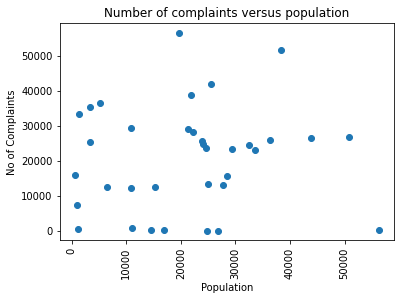

In [40]:
plt.scatter(complaints_df['Population'],complaints_df['no_of_complaints'])
plt.xticks(rotation='vertical')
#plt.figure(figsize=(100,200))
plt.xlabel('Population')
plt.ylabel('No of Complaints')
plt.title("Number of complaints versus population")
plt.show()

# (In)Validation of hypothesis:
It is evident from the graph that there is no relationship between the population and number of complaints. Thus, it is evident that the hypothesis is invalid. 

# References:
1) https://stackoverflow.com/questions/35738199/matplotlib-pyplot-hist-very-slow

2) https://stackoverflow.com/questions/20461165/how-to-convert-index-of-a-pandas-dataframe-into-a-column

3) https://stackoverflow.com/questions/49291740/delete-rows-if-there-are-null-values-in-a-specific-column-in-pandas-dataframe

4) https://www.dataquest.io/blog/pandas-big-data/